In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [6]:
%matplotlib inline

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [8]:
df = pd.read_csv("/Users/neil/Downloads/Boston.csv")
df.head()

,Index,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
df.shape

(506, 15)

In [10]:
#DATA Prepn
X = df.drop(["Index","medv"],axis=1) 

In [11]:
X.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [12]:
y = df["medv"]

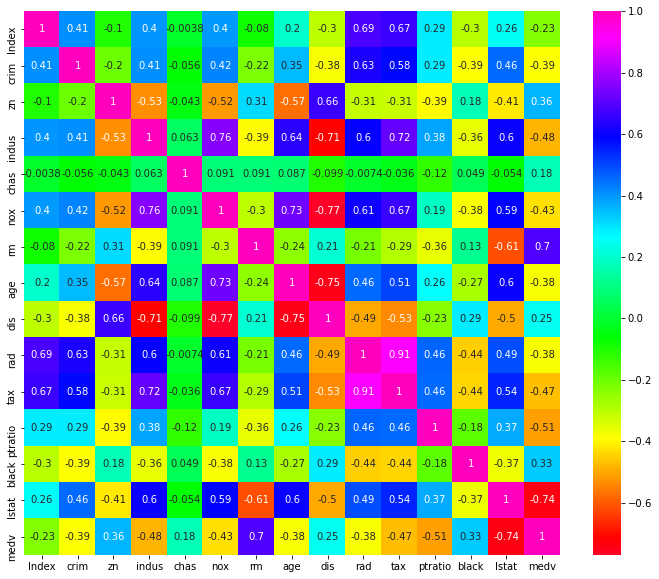

In [13]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap="gist_rainbow")
plt.show()

In [14]:
#Correlation with output variable
cor_target = abs(cor["medv"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

rm         0.695360
ptratio    0.507787
lstat      0.737663
medv       1.000000
Name: medv, dtype: float64

In [15]:
print(df[["rm","ptratio"]].corr())
print(df[["rm","lstat"]].corr())
print(df[["ptratio","lstat"]].corr())

               rm   ptratio
rm       1.000000 -0.355501
ptratio -0.355501  1.000000
             rm     lstat
rm     1.000000 -0.613808
lstat -0.613808  1.000000
          ptratio     lstat
ptratio  1.000000  0.374044
lstat    0.374044  1.000000


In [16]:
#Backward elimination : Wrapper Method
X_1 = sm.add_constant(X)
model = sm.OLS(y,X_1).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          6.72e-135
Time:                        11:51:02   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#Backward Elimination from wrapper method 
cols = list(X.columns) #[]
pmax = 1
while(len(cols)>0):
    p=[]
    X_1=X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols) 
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):           #qualified condition
        cols.remove(feature_with_p_max)
    else:
            break
selected_features_BE = cols
print(selected_features_BE)

['crim', 'zn', 'chas', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']


In [19]:
model = LinearRegression()

In [20]:
#Initializing RFE model
rfe = RFE(model, 11) #RANKING

/Users/neil/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=11 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [21]:
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)

In [22]:
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True False  True  True  True  True False
  True]
[1 1 1 1 1 1 3 1 1 1 1 2 1]


In [23]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 13)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')


/Users/neil/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=13 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [24]:
#Embedded method : Regularisation method, LASSO or penalisation. 

In [25]:
from sklearn.linear_model import  LassoCV, Lasso
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print(coef)

Best alpha using built-in LassoCV: 0.724820
Best score using built-in LassoCV: 0.702444
crim      -0.074266
zn         0.049454
indus     -0.000000
chas       0.000000
nox       -0.000000
rm         1.804385
age        0.011333
dis       -0.813244
rad        0.272284
tax       -0.015425
ptratio   -0.742872
black      0.008926
lstat     -0.703654
dtype: float64


In [26]:
print("Lasso picked " + str(sum(coef != 0)) 
      + " variables and eliminated the other " + 
      str(sum(coef == 0)) + " variables") 

Lasso picked 10 variables and eliminated the other 3 variables


In [27]:
imp_coef = coef.sort_values()
print(imp_coef)

dis       -0.813244
ptratio   -0.742872
lstat     -0.703654
crim      -0.074266
tax       -0.015425
indus     -0.000000
chas       0.000000
nox       -0.000000
black      0.008926
age        0.011333
zn         0.049454
rad        0.272284
rm         1.804385
dtype: float64


Text(0.5, 1.0, 'Feature importance using Lasso Model')

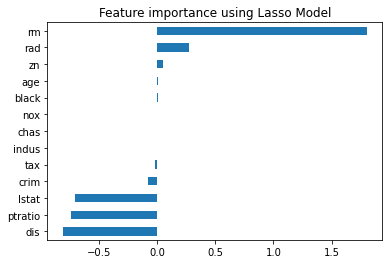

In [31]:
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
#plt.savefig("/Users/nilesh/Desktop/fsm.png")